In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
import os

sys.path.append("/home/ggu7596/ML_collective_behaviors/post_analysis/analysis_classes")
try:
    from post_process_methods import post_process_methods
except ImportError as e:
    print(f"ImportError: {e}")

In [9]:
directory_path = '/home/ggu7596/ML_collective_behaviors/simulation_setup/data_collections/4D_scan_data/high_dim_data_v2'
traj_name = "early_snapshot_1.txt"
trend_name = "trend_snapshot_1.txt"
PP = post_process_methods(directory_path,1)
PP.collect_simulation_paras()
collected_data_1 = PP.collect_high_dim_data(traj_name)
collected_data_2 = PP.collect_high_dim_data(trend_name)

Number of folders: 1000


Explained variance ratio: [0.23707788 0.21046987 0.20651213 0.01702209 0.01539516 0.01414898
 0.00468682 0.00438295 0.00406396 0.00381809]
Explained variance ratio: [0.23707788 0.21046987 0.20651213]


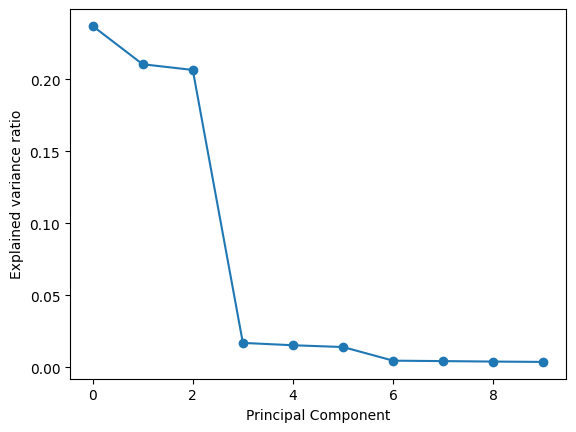

In [10]:
_,explained_variance = PP.PCA_analysis(collected_data_1, n_components = 10)
plt.plot(explained_variance,"o-")
plt.xlabel("Principal Component")
plt.ylabel("Explained variance ratio")
principal_components_1,_ = PP.PCA_analysis(collected_data_1, n_components = 3)

Explained variance ratio: [0.10300625 0.09363302 0.08956162 0.01042505 0.00932786 0.00887002
 0.00859176 0.00803229 0.00782528 0.00769848]
Explained variance ratio: [0.10300625 0.09363302 0.08956162]


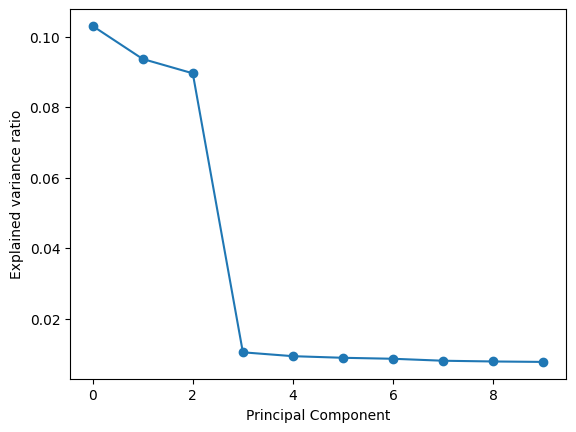

In [11]:
_,explained_variance = PP.PCA_analysis(collected_data_2, n_components = 10)
plt.plot(explained_variance,"o-")
plt.xlabel("Principal Component")
plt.ylabel("Explained variance ratio")
principal_components_2,_ = PP.PCA_analysis(collected_data_2, n_components = 3)

In [12]:
# Label data
PP.save_individual_P_m(time_trunc = 200)

0
100
200
300
400
500
600
700
800
900


In [13]:
PP.collect_all_P_m_data()

In [14]:
label_data = np.loadtxt(open(directory_path+"/labels.txt"))

In [15]:
combined_data = np.concatenate((label_data,principal_components_1,principal_components_2),axis = 1)
np.savetxt(directory_path +"/labels_with_PCA.txt",combined_data)